<img src='https://raw.githubusercontent.com/autonomio/hyperio/master/logo.png' width=250px>

This notebook is a compliment to the *Hyperparameter Optimization on Kears* article. 

## Overview

There are four steps to setting up an experiment with Talos:

1) Imports and data

2) Creating the Keras model

3) Defining the Parameter Space Boundaries 

4) Running the Experiment

## 1. The Required Inputs and Data

In [4]:
import talos as ta
import wrangle as wr
from talos.metrics.keras_metrics import fmeasure_acc
from talos import live

import pandas as pd

from keras.models import Sequential
from keras.layers import Dropout, Dense

# Keras items
from keras.optimizers import Adam, Nadam
from keras.activations import relu, elu
from keras.losses import binary_crossentropy

%matplotlib inline

In [5]:
# then we load the dataset
x, y = ta.datasets.breast_cancer()

# and normalize every feature to mean 0, std 1
x = wr.mean_zero(pd.DataFrame(x)).values

## 2. Creating the Keras Model

In [10]:
# first we have to make sure to input data and params into the function
def breast_cancer_model(x_train, y_train, x_val, y_val, params):

    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss=params['losses'],
                  optimizer=params['optimizer'](),
                  metrics=['acc', fmeasure_acc])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        callbacks=[live()],
                        epochs=params['epochs'],
                        verbose=0)

    return history, model

## 3. Defining the Parameter Space Boundary

In [11]:
# then we can go ahead and set the parameter space
p = {'first_neuron':[9,10,11],
     'hidden_layers':[0, 1, 2],
     'batch_size': [30],
     'epochs': [100],
     'dropout': [0],
     'kernel_initializer': ['uniform','normal'],
     'optimizer': [Nadam, Adam],
     'losses': [binary_crossentropy],
     'activation':[relu, elu],
     'last_activation': ['sigmoid']}

## 4. Starting the Experiment

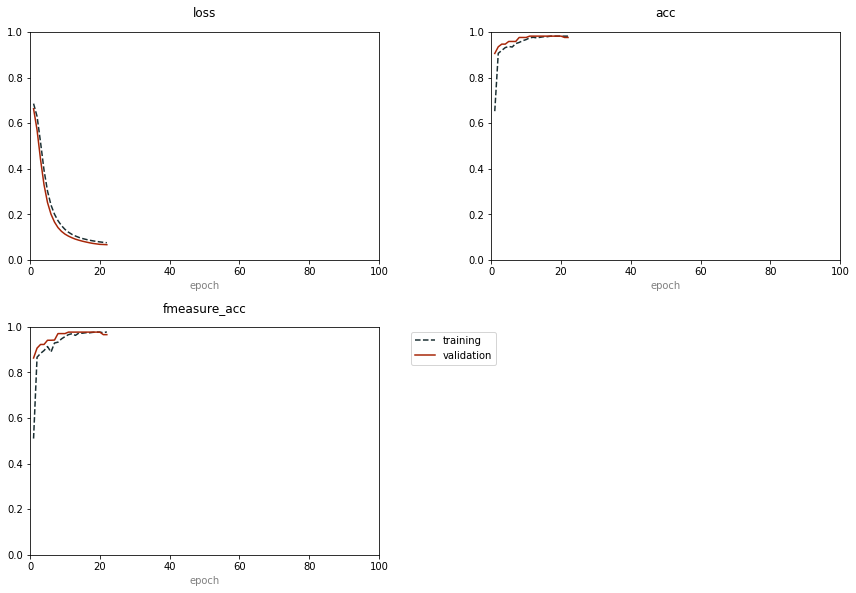

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            model=breast_cancer_model,
            params=p,
            dataset_name='breast_cancer',
            experiment_no='1')